In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from sod.jupyter.utils import * # our user defined functions
# Print a nice doc of the module functions just imported (`printdoc` is defined in `share`)
printdoc()

join,"Join two or more pathname components, inserting '/' as needed"
abspath,Return an absolute path.
dirname,Returns the directory component of a pathname
isfile,Test whether a path is a regular file
isdir,Return true if the pathname refers to an existing directory.
basename,Returns the final component of a pathname
splitext,Split the extension from a pathname
expanduser,Expand ~ and ~user constructions
isabs,Test whether a path is absolute
sys,This module provides access to some objects used or maintained by the
os,OS routines for NT or Posix depending on what system we're on


In [2]:
printhtml('<h3>Defining notebook variables</h3>')

# matplotlib stuff. Note that rcParams need to be input from the second cell on
# (https://github.com/jupyter/notebook/issues/3385#issuecomment-376010658)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font size details, see https://stackoverflow.com/a/39566040
plt.rcParams['figure.figsize'] = (6.29922, 6.29922)  # 16 cm
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
plt.rcParams['figure.dpi'] = 300
# So, here below we want just a way to use the same font for normal text and latex text
# wrapped in $...$. Note that by default $...$ works, it's font family is simply unknown and
# different from the rest of the text. Best could be if we could set ONE font faimly for all:
# it turns out to be complex, because doing what it is suggested here:
# https://matplotlib.org/3.1.1/tutorials/text/usetex.html:
# raises a ! LaTeX Error: File `type1cm.sty' not found.
# Googling it seems we need to install textlive extra, but the problem is that
# BY DEFAULT $...$ WAS RENDERED! thus somehow matplolib must use some latex font with no extra install.
# The solution is to disable:
# 'text.usetext', 'font.serif' and 'font.sans-serif':
# (if you want to restore the following, remember also to delete ~/.matplotlib/tex.cache)
# plt.rcParams['text.usetex'] = True  # should be True by default, set for safety
plt.rcParams['font.family'] = 'sans-serif'  # serif
# plt.rcParams['font.serif'] = 'Computer Modern' #  'Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman'
# plt.rcParams['font.sans-serif'] = 'Computer Modern' # 'Helvetica, Avant Garde, Computer Modern Sans serif'

# plt.rcParams['font.family'] =   'STFangsong,Trebuchet MS,cmss10,InaiMathi,STHeiti,Microsoft Sans Serif,Arial Narrow,Tahoma,Andale Mono,Yu Gothic Medium,AppleGothic,Tahoma,DejaVu Sans,GungSeo,helvetica,arial'
# plt.rcParams['font.weight'] = 'normal'
# if set(plt.rcParams['font.family']) & set(['STFangsong',]):  # note: plt.rcParams['font.family'] has been converted to list
#     plt.rcParams['font.weight'] = 900  # 'bold'

# pandas settings. Some are set in `share`, display max_rows is explicitly set here
pd.set_option('display.max_rows', 25)

TRAINSET = 'allset_train.hdf'  # the first trainingset, without sod_dist
TRAINSET_U = 'uniform_train.hdf'  # the second trainingset, with sod_dist + uniform samples in (mag, dit) cells
TESTSETNAME1 = 'allset_test.hdf'  # the test of allset_train
TESTSETNAME2 = 'allset_unlabelled_annotation2.hdf'  # labelling by Bindi
TESTSETNAME_12 = 'allset_test_AND_allset_unlabelled_annotation2.hdf' # allset_test + labelling by Bindi
TESTSETNAME_UNLABELLED = 'allset_unlabelled.hdf'  # unlabelled stuff from allset_train and allset_test
TESTSETNAME_U = 'uniform_test.hdf'  # TESTNAME_12 + sod_dist

# columns to display for an Evaluation dataframe:
EVALDF_DISPLAYCOLUMNS = ['clf', 'feats', 'n_estimators', 'max_samples', 'random_state', 'average_precision_score',
                         'best_th_pr_curve', 'roc_auc_score', 'log_loss', 'relative_filepath',
                         # these are useless to show. The first is an experimental metric,
                         # the other three are parameters always equal for all models:
                         # 'best_th_roc_curve', 'behaviour', 'contamination',  'tr_set'
                        ]


from sod.core.paths import DATASETS_DIR


SAVE_FIGURES = False  # set to False to disable figures in the function below

def savefig(fig, name):
    '''Save a figure for the paper in a dedicated folder'''
    if not SAVE_FIGURES:
        print('(SAVE_FIGURES=False)')
        return
    root = os.path.expanduser('~')
    outpath = abspath(join(root, 'Nextcloud', 'rizac', 'outliers_paper', 'paper_figures'))
    assert isdir(outpath)
    outpath = join(outpath, name + '.png')
    # printhtml('Saving figure to "~/%s"' % os.path.relpath(abspath(outpath), root))
    printhtml(f'Saving figure to "~/{os.path.relpath(abspath(outpath), root)}" ')
    printhtml(f'(dpi: {plt.rcParams["figure.dpi"]} '
              f'size[w,h]: {plt.rcParams["figure.figsize"][0]:.2f} {plt.rcParams["figure.figsize"][1]:.2f})')
    fig.savefig(outpath, dpi=plt.rcParams['figure.dpi'], format='png')
    # join(dirname(dirname(dirname(os.getcwd())))

import yaml
from stream2segment.process.db import get_session, Segment, Station, Event, loads_inv, Base 

from obspy.signal.spectral_estimation import PPSD

def ppsd(raw_trace, inventory, periods=None):
    '''Returns the arrays
        periods, amplitudes_db
    Where amplitudes are the computed PSD (power spectral density)
    if the argument `periods` is not None but an array or scalar (in seconds), returns:
        periods, amplitudes_db_interpolated_on_periods
    '''
    try:
        # ppsd_ = psd(raw_trace, inventory)
        dt = raw_trace.stats.endtime - raw_trace.stats.starttime  # total_seconds
        ppsd_ = PPSD(raw_trace.stats, metadata=inventory, ppsd_length=int(dt))
        ppsd_.add(raw_trace)
    except Exception as esc:
        raise ValueError('%s error when computing PSD: %s' %
                         (esc.__class__.__name__, str(esc)))
    # check first if we can interpolate ESPECIALLY TO SUPPRESS A WEIRD
    # PRINTOUT (numpy?): something like '5064 5062' which happens
    # on IndexError (len(ppsd_.psd_values)=0)
    if not len(ppsd_.psd_values):
        raise ValueError('Expected 1 psd array, no psd computed')
    x, y = ppsd_.period_bin_centers, ppsd_.psd_values[0]
    if periods is None:
        return x, y
    periods = np.asarray(periods)
    newy = np.interp(np.log10(periods), np.log10(x), y)
    if np.ndim(newy) > 0:
        newy[periods < x[0]] = np.nan
        newy[periods > x[-1]] = np.nan
    return x, newy

print('done')

Defining notebook variables

done


In [14]:
printhtml('<h3>Loading evaluation dataframe</h3>')
eval_df = read_eval_df('evaluationmetrics.hdf') #  read_summary_eval_df()
eval_df = eval_df[eval_df.relative_filepath.str.endswith(os.sep + TESTSETNAME_U)].copy()
eval_df_medians = []
for _, df_ in eval_df.groupby(['n_estimators', 'max_samples', 'feats'], sort=False):
    # display(df_)
    assert len(df_) == 3
    eval_df_medians.append(df_[df_['average_precision_score'] == df_['average_precision_score'].median()])
eval_df_medians = pd.concat(eval_df_medians, axis=0, copy=True)
assert len(eval_df_medians) == len(eval_df)/3
print('Done')

Loading evaluation dataframe

Done


In [64]:
pred_dfs = get_pred_dfs(eval_df_medians[eval_df_medians.n_estimators.isin([50, 100])
                                            & eval_df_medians.feats.str.contains('psd@5sec')
                                            & (eval_df_medians.feats.str.split(',').str.len() <=3)],
                        # https://stackoverflow.com/a/47970591
#                                    & (eval_df_medians.feats == 'psd@5sec')],
                            columns=['predicted_anomaly_score', 'window_type', 'outlier', 'dataset_id'])

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

In [65]:
# printhtml('<h4>Plotting detailed model predictions with n_estimators=%d</h4>' % nest)
data = []
for rowtuple, pred_df in pred_dfs.items():
    row = {'n_estimators': rowtuple.n_estimators,
           'max_samples': rowtuple.max_samples,
           'random_state': rowtuple.random_state,
          'feats': rowtuple.feats}
    scores = []
    for did in [1,2]:
        pred_df_filtered = pred_df[(pred_df.dataset_id==did) &
                                                          (pred_df.window_type)]
#             if did == 3:
#                 display(pred_df_filtered)
#             assert not pred_df_filtered.empty
        aps, best_th, f1max = EVALMETRICS.computeall(pred_df_filtered, EVALMETRICS.APS,
                                                         EVALMETRICS.BEST_TH_PR, EVALMETRICS.F1MAX)
        row[f'aps_{did}_signal'] = aps
        scores.append(aps)
    # row['aps_median'] = np.nanmedian(scores)
    row['aps_hmean1+2_signal'] = 2*row['aps_1_signal']*row['aps_2_signal'] / (row['aps_1_signal'] + row['aps_2_signal'])
    data.append(row)

# data = pd.concat(data, axis=0).sort_values(['aps_median'])
data = pd.DataFrame(data)
# display(data.sort_values('aps_1_signal', ascending=False))


In [66]:
display(data[data.feats=='psd@5sec'].sort_values('aps_hmean1+2_signal', ascending=False))

,aps_1_signal,aps_2_signal,aps_hmean1+2_signal,feats,max_samples,n_estimators,random_state
86,0.900679,0.982504,0.939814,psd@5sec,512,100,11
87,0.895322,0.983975,0.937558,psd@5sec,512,50,11
80,0.888295,0.987116,0.935102,psd@5sec,1024,100,11
82,0.886165,0.987162,0.933941,psd@5sec,2048,100,11
83,0.884585,0.987742,0.933322,psd@5sec,2048,50,11
81,0.883995,0.987871,0.933051,psd@5sec,1024,50,25
84,0.884246,0.986986,0.932796,psd@5sec,4096,100,25
85,0.875973,0.987935,0.928591,psd@5sec,4096,50,11


In [67]:
display(data.sort_values('aps_hmean1+2_signal', ascending=False)[:25])

,aps_1_signal,aps_2_signal,aps_hmean1+2_signal,feats,max_samples,n_estimators,random_state
56,0.909209,0.978193,0.942440,"psd@1sec,psd@2sec,psd@5sec",1024,50,25
57,0.910199,0.976243,0.942065,"psd@1sec,psd@2sec,psd@5sec",1024,100,25
73,0.903188,0.983049,0.941428,"psd@2sec,psd@5sec",1024,100,11
58,0.906066,0.978965,0.941106,"psd@1sec,psd@2sec,psd@5sec",2048,100,25
64,0.902845,0.982525,0.941001,"psd@1sec,psd@5sec",1024,100,11
78,0.910334,0.973601,0.940905,"psd@2sec,psd@5sec",512,50,25
41,0.905840,0.978291,0.940672,"psd@0.5sec,psd@2sec,psd@5sec",1024,50,25
79,0.912434,0.970699,0.940665,"psd@2sec,psd@5sec",512,100,25
65,0.904014,0.980308,0.940617,"psd@1sec,psd@5sec",1024,50,42
48,0.900065,0.984619,0.940445,"psd@0.5sec,psd@5sec",1024,100,11


In [68]:
highmagshortdist_df= pd.read_hdf(join(os.getcwd(), 's2s_2020_05_highmagshortdist.hdf'))

In [75]:
print('Computing scores on segments with high magnitudes and short distances')
data_hs = []
for rowtuple, pred_df in pred_dfs.items():
    featnames = rowtuple.feats.split(',')
    feats_df = highmagshortdist_df[featnames]
    # display(feats_df[:2])
    # display(feats_df[:2].values)
    # raise
    row = {'n_estimators': rowtuple.n_estimators,
           'max_samples': rowtuple.max_samples,
           'random_state': rowtuple.random_state,
           'feats': rowtuple.feats}
    clf = load_clf(dirname(rowtuple.relative_filepath) + '.sklmodel')
    zscorez = -clf.score_samples(feats_df.values)
    row['anomaly_scores_hs_min'] = np.nanmin(zscorez)
    row['anomaly_scores_hs_median'] = np.nanmedian(zscorez)
    row['anomaly_scores_hs_max'] = np.nanmax(zscorez)
    data_hs.append(row)
data_hs = pd.DataFrame(data_hs)
print('Done')

Computing scores on segments with high magnitudes and short distances
Done


In [80]:
display(data_hs.sort_values('anomaly_scores_hs_median', ascending=True)[:25])
display(data_hs[(data_hs.n_estimators==100) & (data_hs.max_samples==1024) & (data_hs.feats=='psd@5sec')].sort_values('anomaly_scores_hs_median', ascending=True))


,anomaly_scores_hs_max,anomaly_scores_hs_median,anomaly_scores_hs_min,feats,max_samples,n_estimators,random_state
85,0.826532,0.717451,0.425725,psd@5sec,4096,50,11
36,0.814287,0.721980,0.382841,"psd@0.5sec,psd@1sec,psd@5sec",4096,50,25
53,0.825082,0.722404,0.402534,"psd@0.5sec,psd@5sec",4096,50,25
84,0.839697,0.724911,0.424669,psd@5sec,4096,100,25
37,0.812502,0.725087,0.379737,"psd@0.5sec,psd@1sec,psd@5sec",4096,100,25
21,0.811432,0.725610,0.383320,"psd@0.2sec,psd@2sec,psd@5sec",4096,50,25
20,0.809298,0.728220,0.384896,"psd@0.2sec,psd@2sec,psd@5sec",4096,100,25
13,0.815002,0.733334,0.385456,"psd@0.2sec,psd@1sec,psd@5sec",4096,50,11
29,0.840435,0.734150,0.415296,"psd@0.2sec,psd@5sec",4096,50,25
5,0.818588,0.734594,0.385276,"psd@0.2sec,psd@0.5sec,psd@5sec",4096,50,11


,anomaly_scores_hs_max,anomaly_scores_hs_median,anomaly_scores_hs_min,feats,max_samples,n_estimators,random_state
80,0.834844,0.791554,0.418346,psd@5sec,1024,100,11


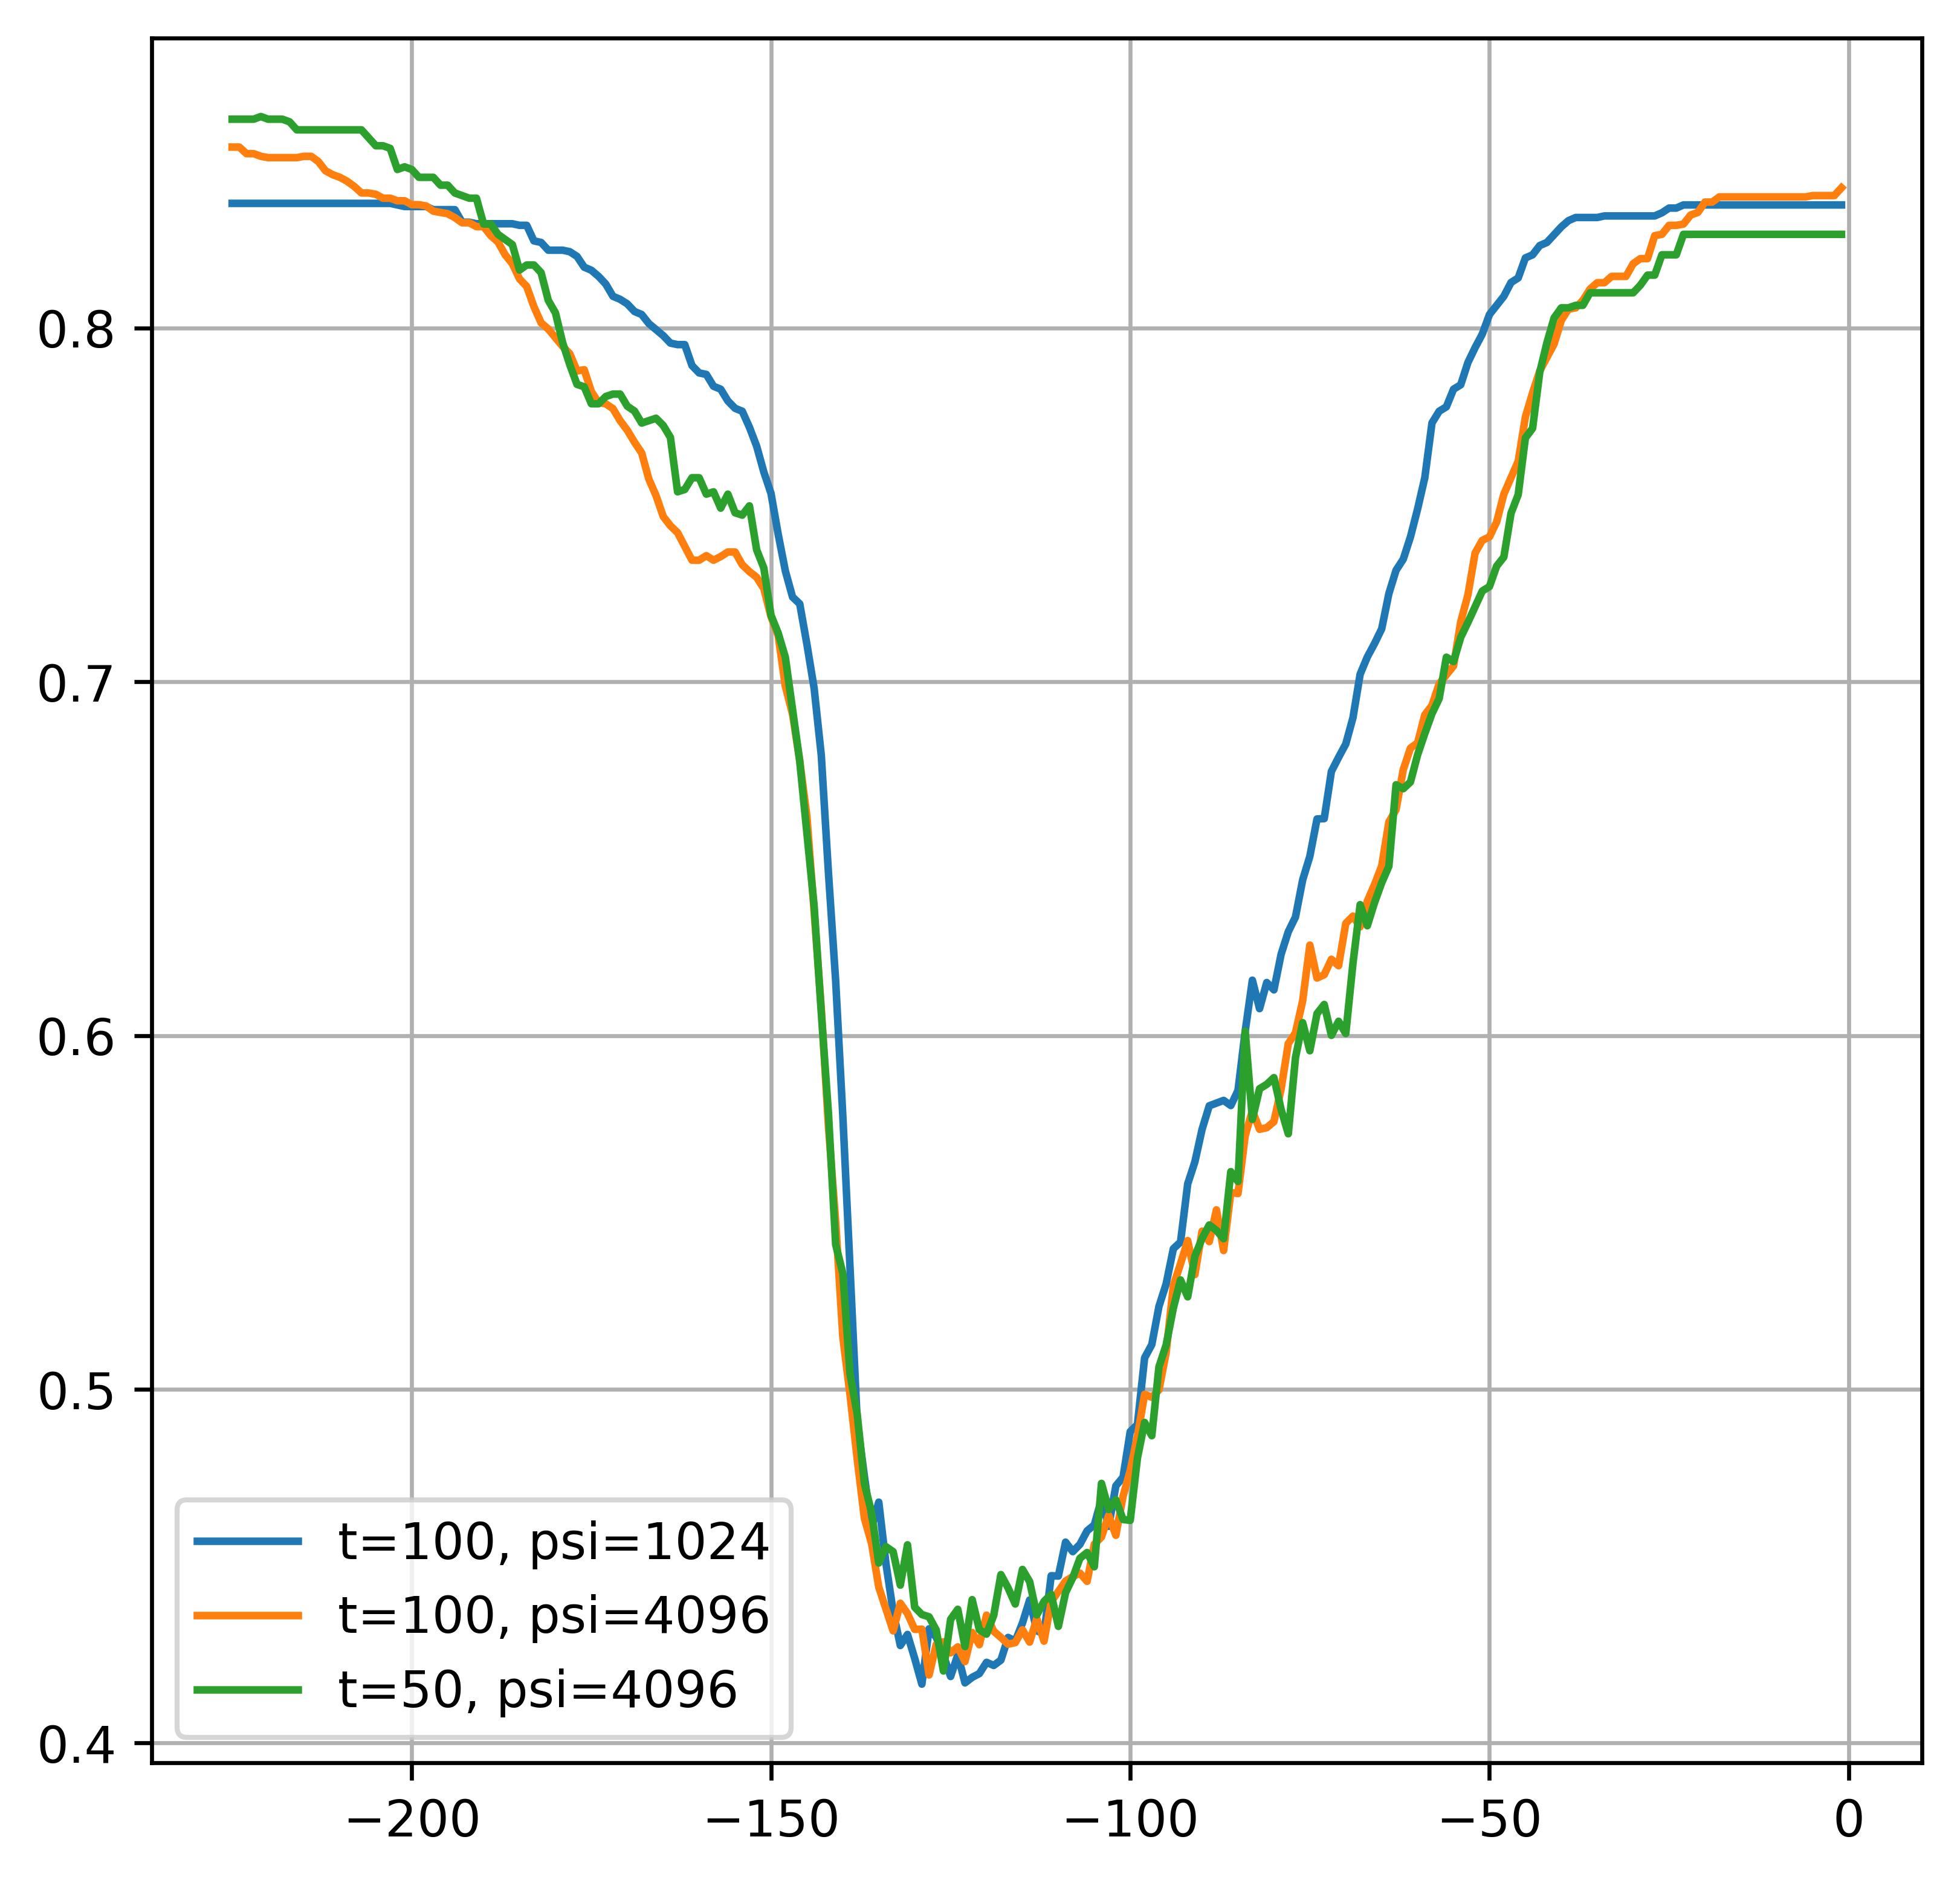

In [74]:
psd5 = np.arange(-225, 0, 1)
psd5 = psd5.reshape(len(psd5), 1)
for rowtuple, pred_df in pred_dfs.items():
    if rowtuple.feats != 'psd@5sec':
        continue
    if (rowtuple.n_estimators == 100 and rowtuple.max_samples == 1024) or (rowtuple.max_samples == 4096):
        clf = load_clf(dirname(rowtuple.relative_filepath) + '.sklmodel')
        plt.plot(psd5, -clf.score_samples(psd5), label=f't={rowtuple.n_estimators}, psi={rowtuple.max_samples}')
plt.legend()
plt.grid()
plt.show()


Plotting best models in details. All metrics computed on test set "uniform_test.hdf"

Grouping models by (n_estimators, max_samples) and keeping those with median average precision score

,clf,feats,n_estimators,max_samples,random_state,average_precision_score,best_th_pr_curve,roc_auc_score,log_loss,relative_filepath
1592,IsolationForest,psd@5sec,100,1024,11,0.970564,0.739007,0.975348,0.577372,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/uniform_test.hdf
1604,IsolationForest,psd@5sec,100,512,11,0.970490,0.743559,0.975866,0.604658,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=100&random_state=11/uniform_test.hdf
1599,IsolationForest,psd@5sec,50,2048,11,0.970213,0.737760,0.975100,0.559445,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=50&random_state=11/uniform_test.hdf
1596,IsolationForest,psd@5sec,100,2048,11,0.970131,0.723908,0.974888,0.559709,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=11/uniform_test.hdf
1595,IsolationForest,psd@5sec,50,1024,25,0.969853,0.739561,0.975201,0.574039,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=25/uniform_test.hdf
1602,IsolationForest,psd@5sec,100,4096,25,0.969622,0.680671,0.974166,0.556366,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=100&random_state=25/uniform_test.hdf
1606,IsolationForest,psd@5sec,50,512,11,0.968845,0.745870,0.975527,0.605512,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=50&random_state=11/uniform_test.hdf
1601,IsolationForest,psd@5sec,50,4096,11,0.968842,0.668166,0.973910,0.556683,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=50&random_state=11/uniform_test.hdf


Defining plot function and plotting

Plotting detailed model predictions with n_estimators=100

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

(SAVE_FIGURES=False)


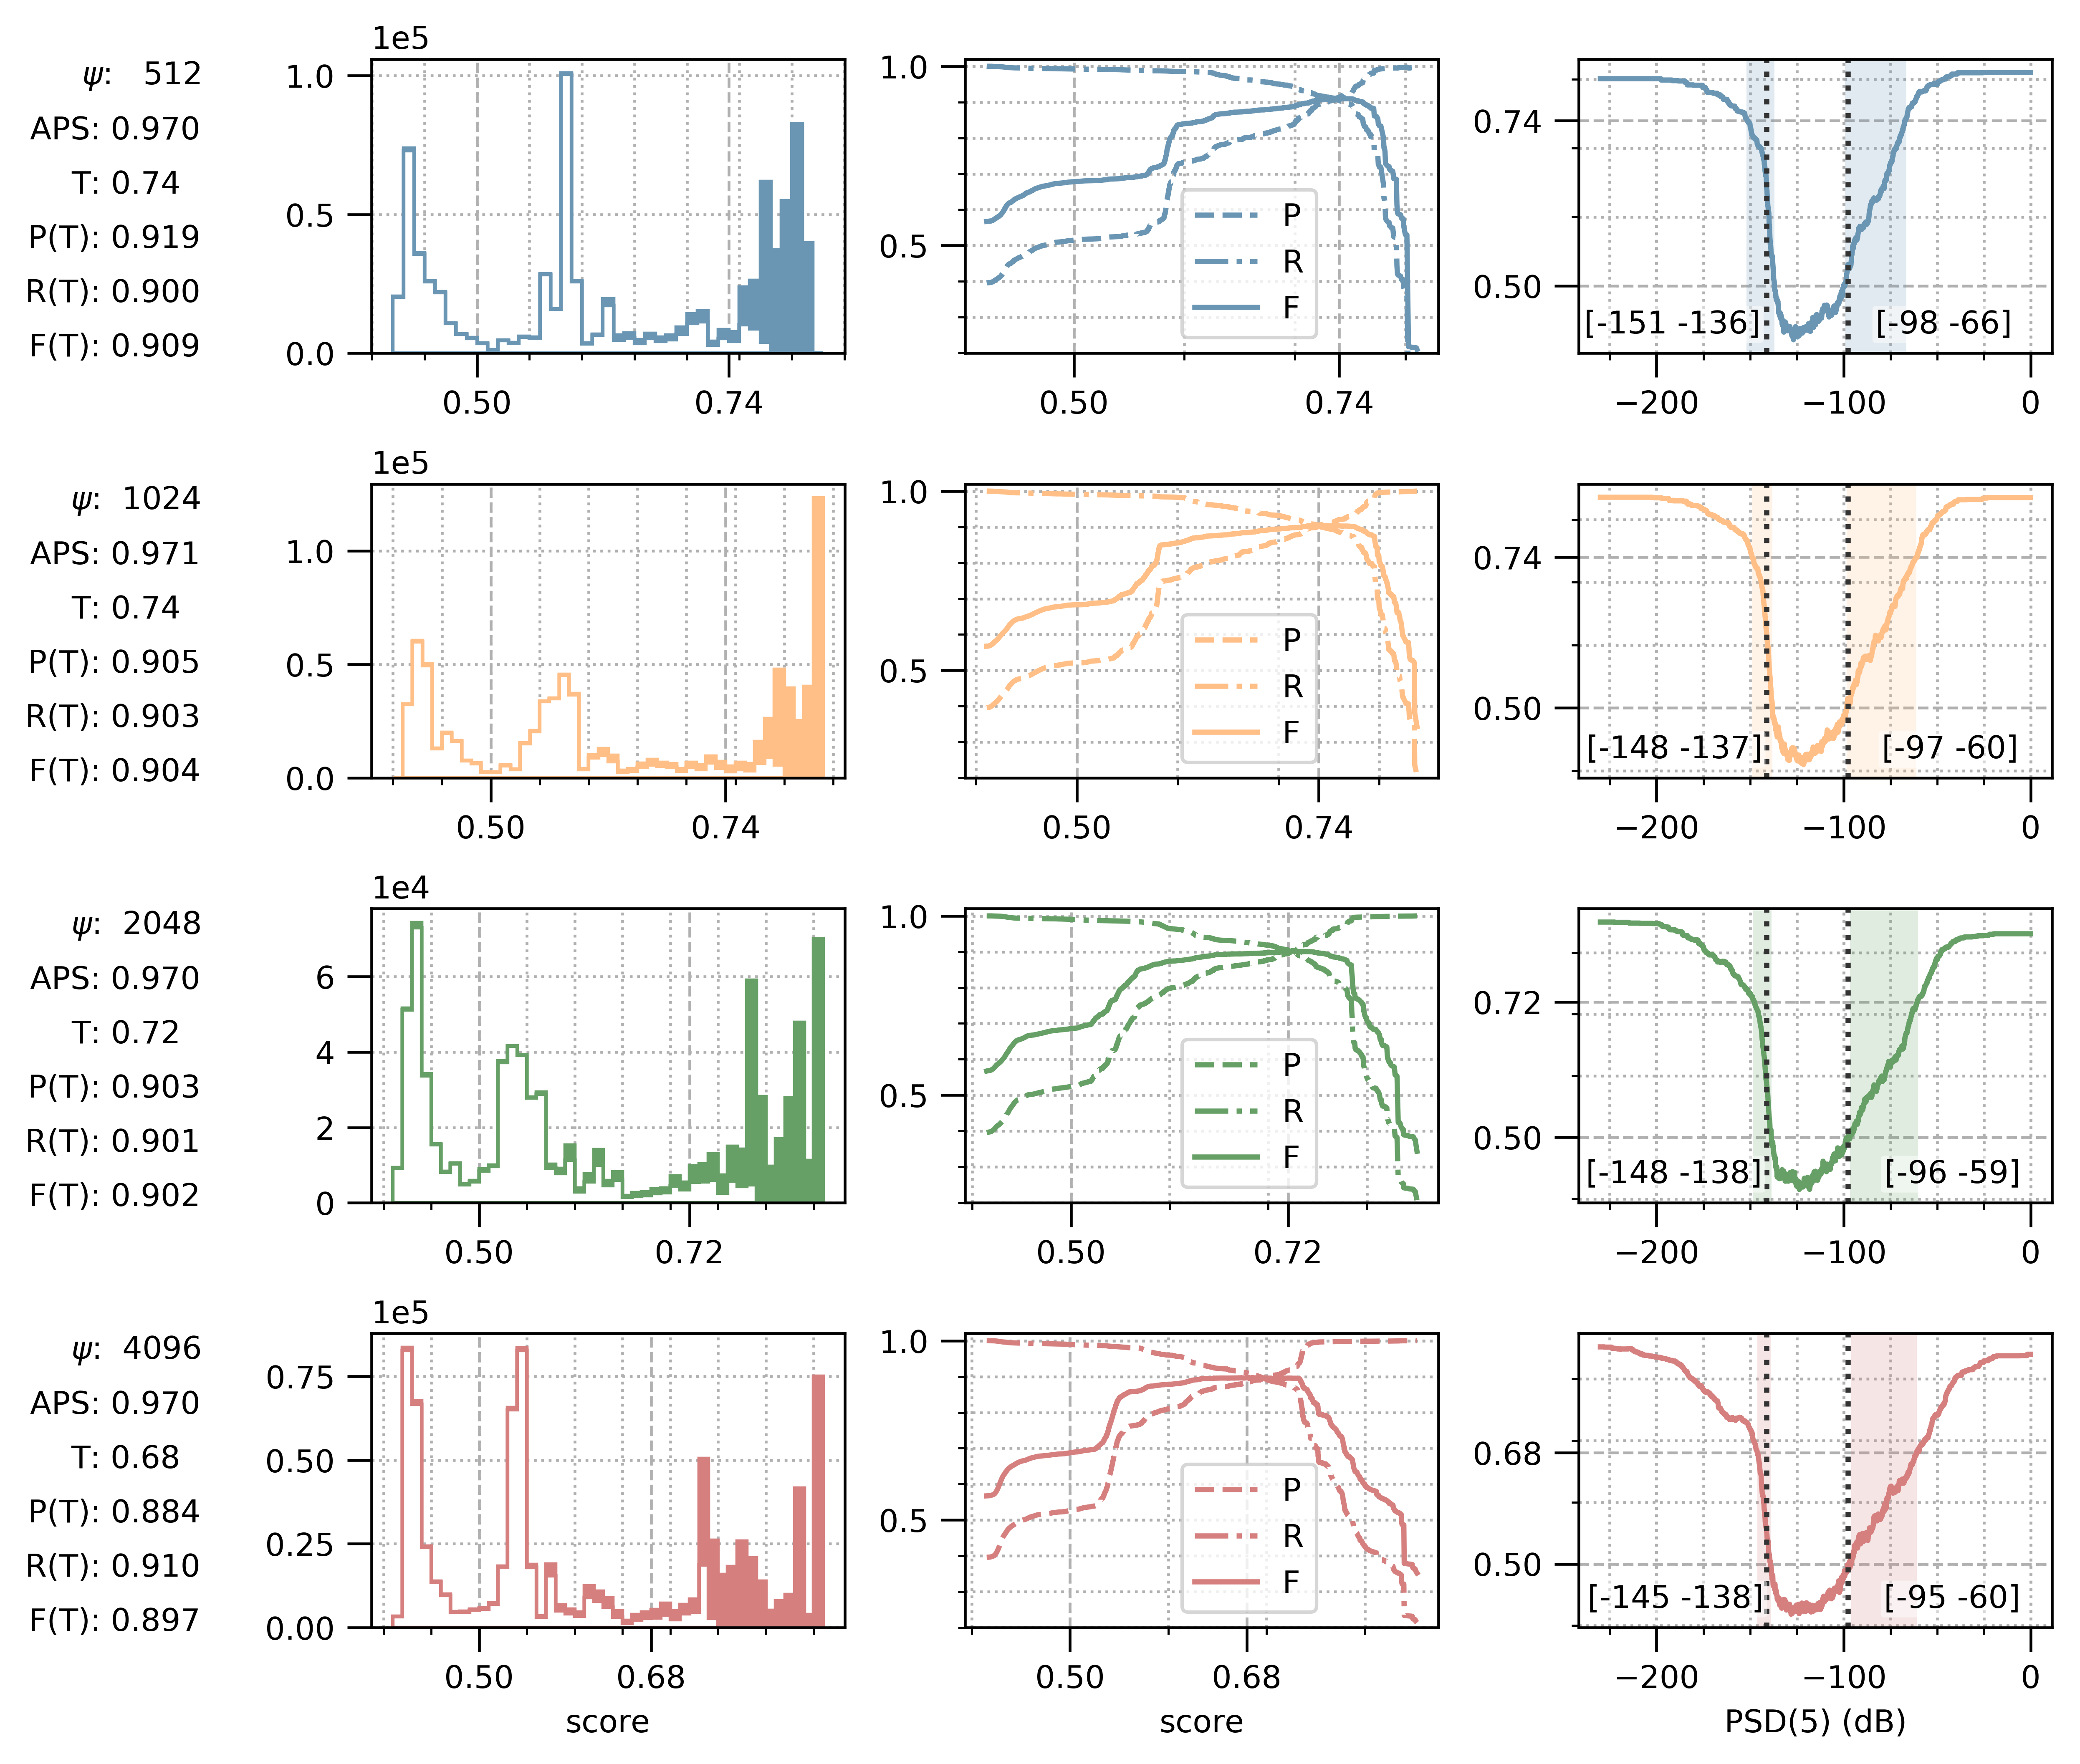

Plotting detailed model predictions with n_estimators=50

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

(SAVE_FIGURES=False)


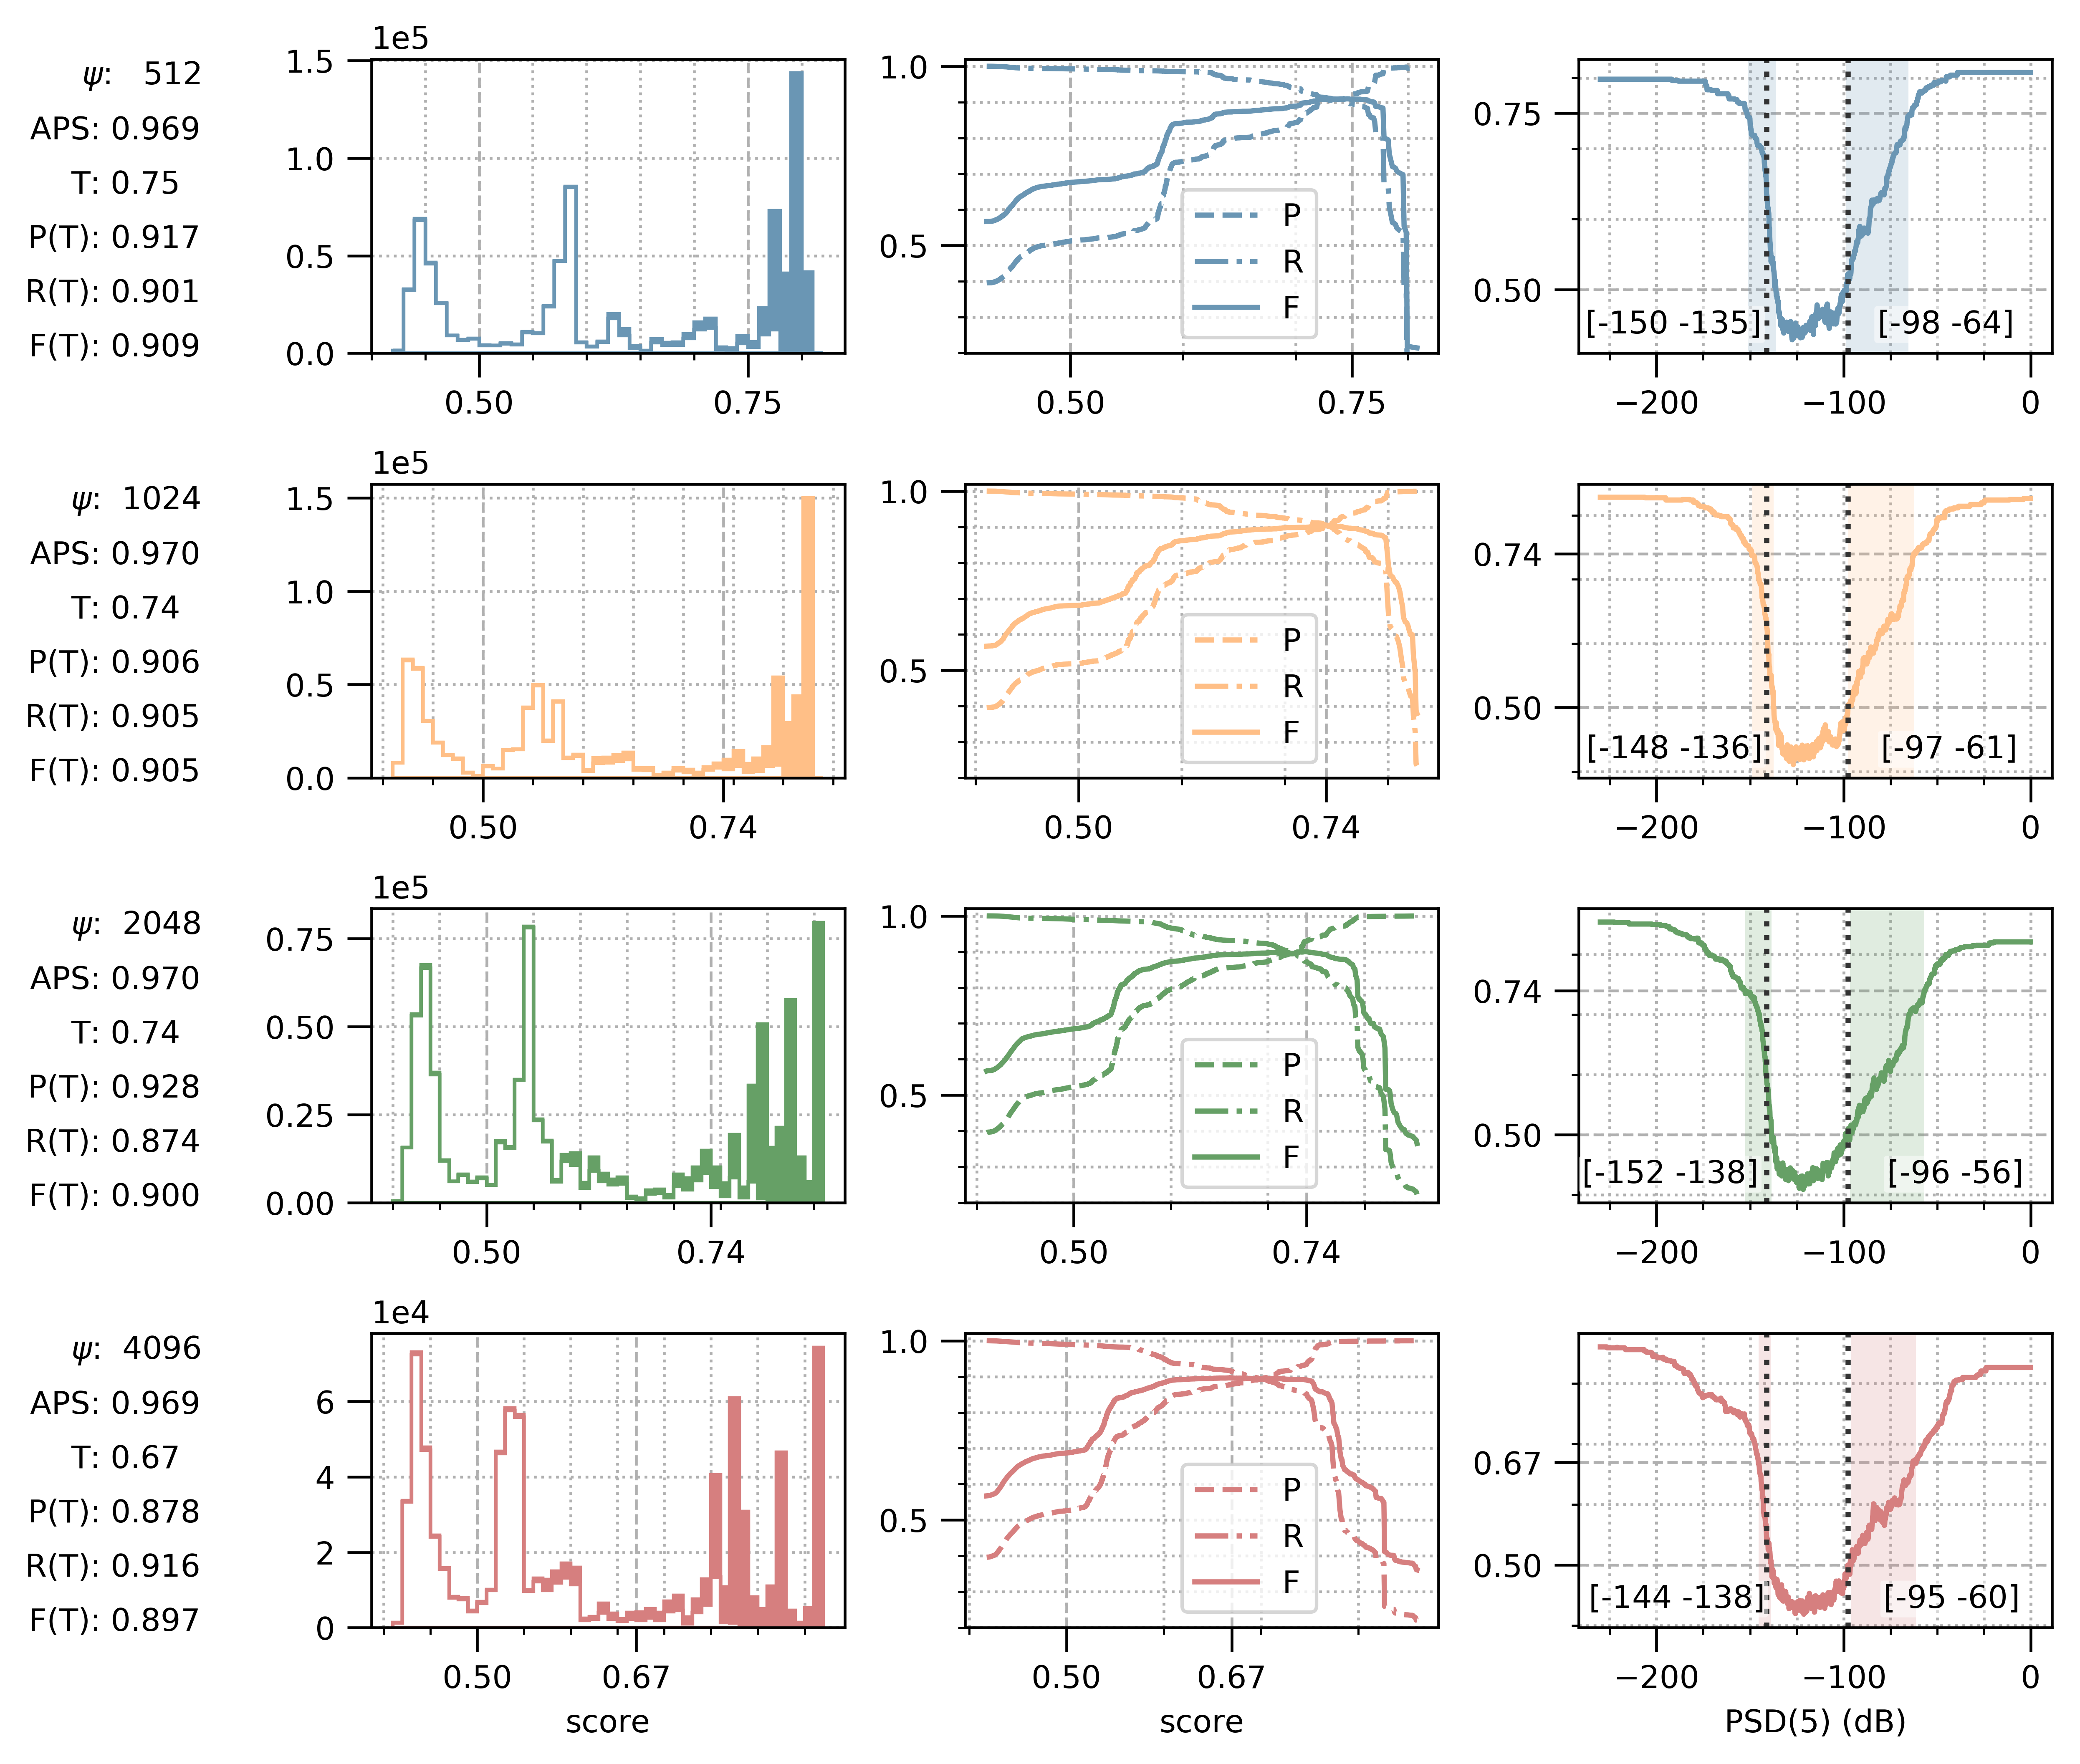

In [50]:
setname = TESTSETNAME_U

printhtml('<h3>Plotting best models in details. All metrics computed on test set "%s"</h3>' % setname)


printhtml('<h4>Grouping models by (n_estimators, max_samples) and keeping those with median '
          'average precision score</h4>')

eval_df2 = []
for _, _df in eval_df[(eval_df.feats == 'psd@5sec') &
                      (eval_df.relative_filepath.str.endswith(os.sep + setname))].\
        groupby(['n_estimators', 'max_samples']):
    _df = _df[_df.average_precision_score == _df.average_precision_score.median()]
    # _df = _df[_df.random_state == 11]
    assert len(_df) == 1
    eval_df2.append(_df)
    # eval_df2.append(_df.sort_values('average_precision_score')[1:2])  # median
eval_df2 = pd.concat(eval_df2, axis=0, sort=False)

pd.set_option('display.max_rows', 500)
# display(eval_df.sort_values(['average_precision_score'], ascending=False).head(30))
display(eval_df2.sort_values(['average_precision_score'], ascending=False)[EVALDF_DISPLAYCOLUMNS])



printhtml('<h4>Defining plot function and plotting</h4>')

def plot_prediction_per_maxsamples(pred_dfs):
    
    from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                   AutoMinorLocator)

    # printhtml('<h3>Summary plots n_estimators=200 only (and random_state=11)</h3>')

    PETTERSON_PERIOD = 5  # set to 0 to ignore

    rows, cols = len(pred_dfs), 4
    # rows, cols = 2*len(pred_dfs), 3
    fig = plt.figure(constrained_layout=True)
    gsp = fig.add_gridspec(rows, cols, width_ratios=[1,10, 10, 10])
    # gsp = fig.add_gridspec(rows, cols, height_ratios=[1,15] * len(pred_dfs))
    colors = get_colors(len(pd.unique([_.max_samples for _ in pred_dfs.keys()])))
    psdperiods = np.arange(-230, 0, 0.1)

    # axs_all = [[], [], []]
    for idx, (rowtuple, pred_df) in enumerate(pred_dfs.items()):
        title= "(max_s=%s)" % (rowtuple.max_samples)

        # SEGMENTS DISTRIBUTION PLOT
        aps, p, r, th, f = EVALMETRICS.computeall(pred_df, EVALMETRICS.APS,
                                                  EVALMETRICS.PMAX, EVALMETRICS.RMAX,
                                                  EVALMETRICS.BEST_TH_PR, EVALMETRICS.F1MAX)

        axs = fig.add_subplot(gsp[idx, 1])
        mpl_hist_args = {
            'color': ['white', colors[idx]],
            'edgecolor':colors[idx],
            'histtype': 'stepfilled', 'stacked': True,
            # 'linewidth': 2
        }
        axs = plot_freq_distribution(pred_df, axs, title='', mpl_hist_args=mpl_hist_args)
        axs.set_xticks([0.5, np.round(th, 2)])
        axs.tick_params(which='major', length=7)
        axs.grid(axis="both", which='both', linestyle=':')
        axs.grid(axis="x", which='major', linestyle='--')
        axs.set_axisbelow(True)
        if idx < len(pred_dfs) - 1:
            axs.set_xlabel('')
        axs.set_ylabel('')

        # P, R, F PLOT
        axs = fig.add_subplot(gsp[idx, 2])
        axs = plot_pre_rec_fscore(pred_df, axs, title='', mpl_plot_args={'color': colors[idx]})
        axs.tick_params(which='major', length=7)
        axs.grid(axis="both", which='both', linestyle=':')
        axs.grid(axis="x", which='major', linestyle='--')
        # get the labels and replace them:
        old_legend = f'\nT: {axs.get_lines()[0].get_label()[2:6]:}  '  # <- last space for alignmenet (see plots)
        for line in axs.get_lines():
            old_legend += f'\n{line.get_label()[:2]}T{line.get_label()[6:]}'.replace('=', ': ')
            line.set_label(line.get_label()[:1])  # P, R , F
        # bbox_to_anchor: A 2-tuple (x, y) places the corner of the legend specified by `loc` at x, y. 
        lgnd = axs.legend(loc='lower center', bbox_to_anchor=(0.6, 0),
                          # handletextpad=0.1, #handlelength=1 # https://stackoverflow.com/a/49689249
                         )  
        axs.set_ylim(0.2, 1.02)
        axs.set_axisbelow(True)
        if idx < len(pred_dfs) - 1:
            axs.set_xlabel('')
        axs.set_ylabel('')

        # SCORE VS PSD PLOT
        axs = fig.add_subplot(gsp[idx, 3])
        clf = load_clf(dirname(rowtuple.relative_filepath) + '.sklmodel')
        scores = -clf.score_samples(psdperiods.reshape(len(psdperiods), 1))
        # plot scores:
        axs.plot(psdperiods, scores, color=colors[idx])  # , linewidth=2)
        # plot petterson:
        pbounds = get_petterson_bounds(PETTERSON_PERIOD)
        axs.axvline(pbounds[0], linestyle=':', color=[.2, .2, .2])  # , linewidth=2)
        axs.axvline(pbounds[1], linestyle=':', color=[.2, .2, .2])  # , linewidth=2)
        # plot shaded areas between 0.5 and score optimizing f1score:
        indices1 = argwhere_array_equals_value(scores, th)
        indices2 = argwhere_array_equals_value(scores, 0.5)
        psd_l = psdperiods[indices1[0]], psdperiods[indices2[0]]
        axs.axvspan(psd_l[0], psd_l[1], alpha=0.2, linestyle='--', linewidth=0, color=colors[idx])
        psd_h = psdperiods[indices2[-1]], psdperiods[indices1[-1]]
        axs.axvspan(psd_h[0], psd_h[1], alpha=0.2, linestyle='--', linewidth=0, color=colors[idx])
        # displaying bounds:
        bound1 = str([int(psd_l[0]+0.5), int(psd_l[1]+0.5)]).replace(',', '')
        bound2 = str([int(psd_h[0]+0.5), int(psd_h[1]+0.5)]).replace(',', '')
        w1 = float(psd_l[1] - psd_l[0])
        w2 = float(psd_h[1] - psd_h[0])
        # we use bbox argument of axs.text to have more control over the oputput. Some abbreviations:
        # are: fc (facecolor), ec (edgecolor), lw=0 (actually, with lw=0 below we invalidate ec)
        bboxargs = dict(boxstyle='round,pad=0.1', fc=[1,1,1,0.5], ec=plt.rcParams['legend.edgecolor'], lw=0)
        axs.text(psd_l[1] - w1/2.0, min(scores), bound1, ha='right', va='bottom', backgroundcolor=[1,1,1,0.5],
                bbox=bboxargs)
        axs.text(psd_h[0] + w2/2.0, min(scores), bound2, ha='left', va='bottom', backgroundcolor=[1,1,1,0.5],
                bbox=bboxargs)
        # set axis ticks:
        axs.xaxis.set_minor_locator(MultipleLocator(25))
        axs.yaxis.set_minor_locator(MultipleLocator(0.1))
        axs.grid(axis="both", which='both', linestyle=':')
        axs.grid(axis="y", which='major', linestyle='--')
        axs.set_yticks([0.5, np.round(th, 2)])
        axs.tick_params(which='major', length=7)
        if idx == len(pred_dfs) - 1:
            axs.set_xlabel('PSD(5) (dB)')
        # axs.set_ylabel('score')
        axs.set_axisbelow(True)

        # summary in the leftmost plot:
        # plot it as last so we have all data avilable
        axs = fig.add_subplot(gsp[idx, 0])
        text = f'$\psi$: {rowtuple.max_samples:>5d}\nAPS: {aps:.3f}' # % (rowtuple.max_samples, aps)
        text += old_legend
        axs.text(0.5, 1, text, ha='right', va='top', rotation=0, linespacing=2)  # , family='monospace') 
        axs.set_axis_off()

    return fig

_f = plt.rcParams['font.size'] * .9
with rcparams({'font.size': _f, 'axes.titlesize': _f}, figsizeratio=(1.3, 1.1)):  #  {'font.size': 12}, hratio=.9):  # {'figure.figsize'] = (14, 16), plt.rcParams['font.size'] = 14
    for nest in [100, 50]:  # [50, 100, 200]:
        print()
        printhtml('<h4>Plotting detailed model predictions with n_estimators=%d</h4>' % nest)
        pred_dfs = get_pred_dfs(eval_df2[eval_df2.n_estimators == nest], columns=['predicted_anomaly_score', 'window_type', 'outlier', 'dataset_id'])
        # for _ in list(pred_dfs):
        #    pred_dfs[_] = pred_dfs[_][(pred_dfs[_].dataset_id==1) & ((pred_dfs[_].window_type))]
        fig = plot_prediction_per_maxsamples(pred_dfs)
        savefig(fig, 'feat5sec_allperfs_nest=%d' % nest)
        plt.show()